In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 2011.csv to 2011.csv
Saving 2012.csv to 2012.csv
Saving 2013.csv to 2013.csv
Saving 2014.csv to 2014.csv
Saving 2015.csv to 2015.csv
Saving 2016.csv to 2016.csv
Saving 2017.csv to 2017.csv
Saving 2018.csv to 2018.csv
Saving 2019.csv to 2019.csv
Saving 2020.csv to 2020.csv
Saving 2021.csv to 2021.csv
Saving 2022.csv to 2022.csv


In [ ]:
uploaded = files.upload()


Saving 2013.csv to 2013.csv
Saving 2014.csv to 2014.csv


In [ ]:
uploaded = files.upload()

Saving 2015.csv to 2015.csv
Saving 2016.csv to 2016.csv
Saving 2017.csv to 2017.csv
Saving 2018.csv to 2018.csv
Saving 2019.csv to 2019.csv
Saving 2021.csv to 2021.csv
Saving 2022.csv to 2022.csv
Saving tweets.csv to tweets.csv


In [ ]:
uploaded = files.upload()

Saving 2020.csv to 2020.csv


# Data Analysis

In [3]:
df_2011 = pd.read_csv('/content/2011.csv')
df_2012 = pd.read_csv('/content/2012.csv')
df_2013 = pd.read_csv('/content/2013.csv')
df_2014 = pd.read_csv('/content/2014.csv')
df_2015 = pd.read_csv('/content/2015.csv')
df_2016 = pd.read_csv('/content/2016.csv')
df_2017 = pd.read_csv('/content/2017.csv')
df_2018 = pd.read_csv('/content/2018.csv')
df_2019 = pd.read_csv('/content/2019.csv')
df_2020 = pd.read_csv('/content/2020.csv')
df_2021 = pd.read_csv('/content/2021.csv')
df_2022 = pd.read_csv('/content/2022.csv')

In [4]:
df = pd.concat([df_2011, df_2012,df_2013,df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022])
df_baseline=df
df

,YEAR,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,CRS_ARR_TIME,...,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,ORIGIN,ARR_DELAY
0,2011,1,2,AA,ABQ,1915,2002,47,1,2005.0,...,110.0,1.0,0,0.0,47.0,63.0,0.0,0.0,NaN,NaN
1,2011,1,2,AA,ATL,925,1021,56,1,1225.0,...,84.0,1.0,0,0.0,41.0,28.0,0.0,15.0,NaN,NaN
2,2011,1,2,AA,ATL,1015,1014,0,0,1215.0,...,11.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011,1,2,AA,ATL,1535,1533,0,0,1740.0,...,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011,1,2,AA,ATL,1940,1945,5,0,2145.0,...,4.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251644,2022,28,1,WN,BNA,725,722,0,0,855.0,...,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,VPS,NaN
251645,2022,28,1,WN,BNA,1025,1023,0,0,1145.0,...,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,VPS,NaN
251646,2022,28,1,WN,BNA,1700,1656,0,0,1820.0,...,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,VPS,NaN
251647,2022,28,1,WN,BWI,1500,1456,0,0,1830.0,...,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,VPS,NaN


In [5]:
#info on dataset
df.head()

,YEAR,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,CRS_ARR_TIME,...,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,ORIGIN,ARR_DELAY
0,2011,1,2,AA,ABQ,1915,2002,47,1,2005.0,...,110.0,1.0,0,0.0,47.0,63.0,0.0,0.0,NaN,NaN
1,2011,1,2,AA,ATL,925,1021,56,1,1225.0,...,84.0,1.0,0,0.0,41.0,28.0,0.0,15.0,NaN,NaN
2,2011,1,2,AA,ATL,1015,1014,0,0,1215.0,...,11.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011,1,2,AA,ATL,1535,1533,0,0,1740.0,...,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011,1,2,AA,ATL,1940,1945,5,0,2145.0,...,4.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2656634 entries, 0 to 251648
Data columns (total 21 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   DAY_OF_MONTH         int64  
 2   DAY_OF_WEEK          int64  
 3   OP_UNIQUE_CARRIER    object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             int64  
 7   DEP_DELAY_NEW        int64  
 8   DEP_DEL15            int64  
 9   CRS_ARR_TIME         float64
 10  ARR_TIME             float64
 11  ARR_DELAY_NEW        float64
 12  ARR_DEL15            float64
 13  CANCELLED            int64  
 14  CARRIER_DELAY        float64
 15  WEATHER_DELAY        float64
 16  NAS_DELAY            float64
 17  SECURITY_DELAY       float64
 18  LATE_AIRCRAFT_DELAY  float64
 19  ORIGIN               object 
 20  ARR_DELAY            float64
dtypes: float64(10), int64(8), object(3)
memory usage: 445.9+ MB


In [ ]:
df.describe()

,YEAR,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,ARR_DELAY
count,2.656634e+06,2.656634e+06,2.656634e+06,2.656634e+06,2.656634e+06,2.656634e+06,2.656634e+06,1.838194e+06,2.655664e+06,2.651917e+06,2.651917e+06,2656634.0,444349.000000,444349.000000,444349.000000,444349.000000,444349.000000,816661.000000
mean,2.016637e+03,1.470822e+01,3.923999e+00,1.321075e+03,1.328235e+03,1.083616e+01,1.718882e-01,1.515246e+03,1.498848e+03,1.047947e+01,1.675577e-01,0.0,18.918028,3.096904,12.830525,0.097734,21.307409,1.956403
std,3.435346e+00,8.314411e+00,1.983960e+00,4.739918e+02,4.844608e+02,3.661990e+01,3.772833e-01,4.888164e+02,5.099119e+02,3.629898e+01,3.734731e-01,0.0,55.024292,27.065171,26.074123,3.224354,43.915690,42.452408
min,2.011000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-94.000000
25%,2.014000e+03,7.000000e+00,2.000000e+00,9.150000e+02,9.180000e+02,0.000000e+00,0.000000e+00,1.130000e+03,1.117000e+03,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-16.000000
50%,2.016000e+03,1.500000e+01,4.000000e+00,1.315000e+03,1.323000e+03,0.000000e+00,0.000000e+00,1.534000e+03,1.527000e+03,0.000000e+00,0.000000e+00,0.0,3.000000,0.000000,2.000000,0.000000,1.000000,-7.000000
75%,2.020000e+03,2.200000e+01,6.000000e+00,1.720000e+03,1.731000e+03,7.000000e+00,0.000000e+00,1.920000e+03,1.923000e+03,6.000000e+00,0.000000e+00,0.0,18.000000,0.000000,18.000000,0.000000,26.000000,6.000000
max,2.022000e+03,3.100000e+01,7.000000e+00,2.359000e+03,2.400000e+03,2.814000e+03,1.000000e+00,2.359000e+03,2.400000e+03,2.797000e+03,1.000000e+00,0.0,2791.000000,1581.000000,1307.000000,442.000000,2050.000000,1757.000000


In [ ]:
df.dtypes

YEAR                     int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
OP_UNIQUE_CARRIER       object
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME                 int64
DEP_DELAY_NEW            int64
DEP_DEL15                int64
CRS_ARR_TIME           float64
ARR_TIME               float64
ARR_DELAY_NEW          float64
ARR_DEL15              float64
CANCELLED                int64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
ORIGIN                  object
ARR_DELAY              float64
dtype: object

In [ ]:
df.isnull().sum()

YEAR                         0
DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_UNIQUE_CARRIER            0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                     0
DEP_DELAY_NEW                0
DEP_DEL15                    0
CRS_ARR_TIME            818440
ARR_TIME                   970
ARR_DELAY_NEW             4717
ARR_DEL15                 4717
CANCELLED                    0
CARRIER_DELAY          2212285
WEATHER_DELAY          2212285
NAS_DELAY              2212285
SECURITY_DELAY         2212285
LATE_AIRCRAFT_DELAY    2212285
ORIGIN                  905147
ARR_DELAY              1839973
dtype: int64

<ipython-input-22-1ea010c7fde1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr().round(2)


<Axes: >

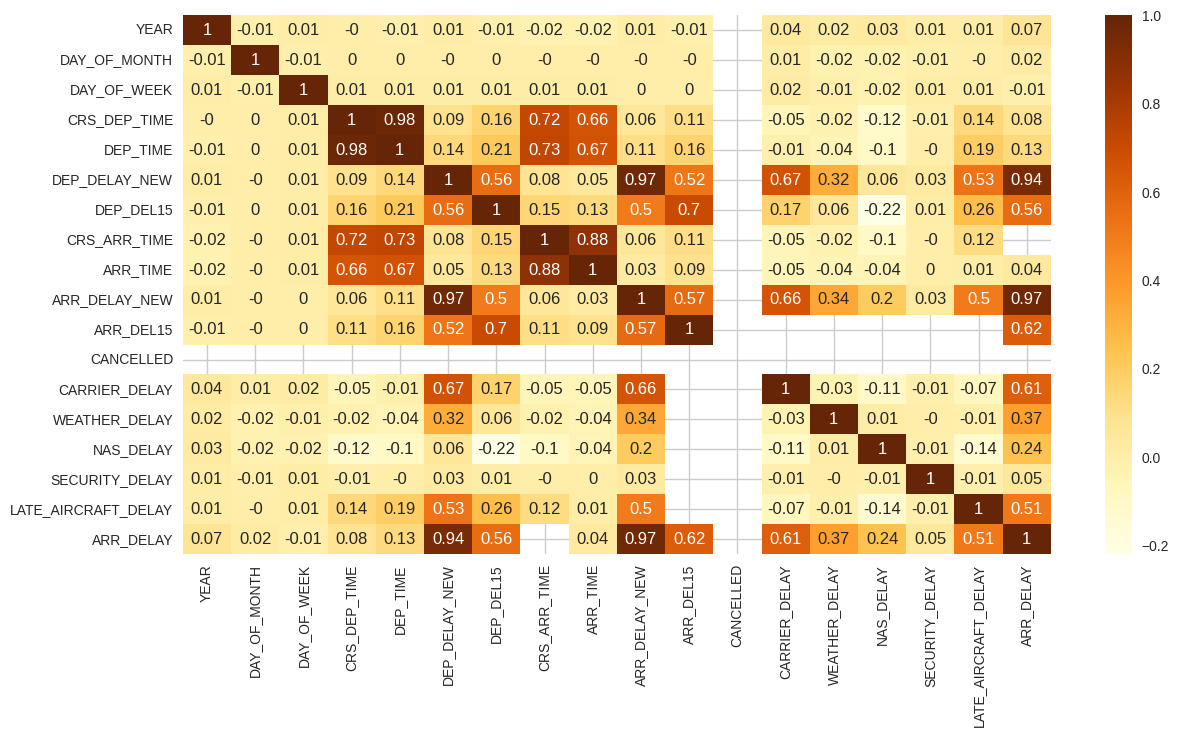

In [ ]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

<Axes: xlabel='ARR_DEL15', ylabel='count'>

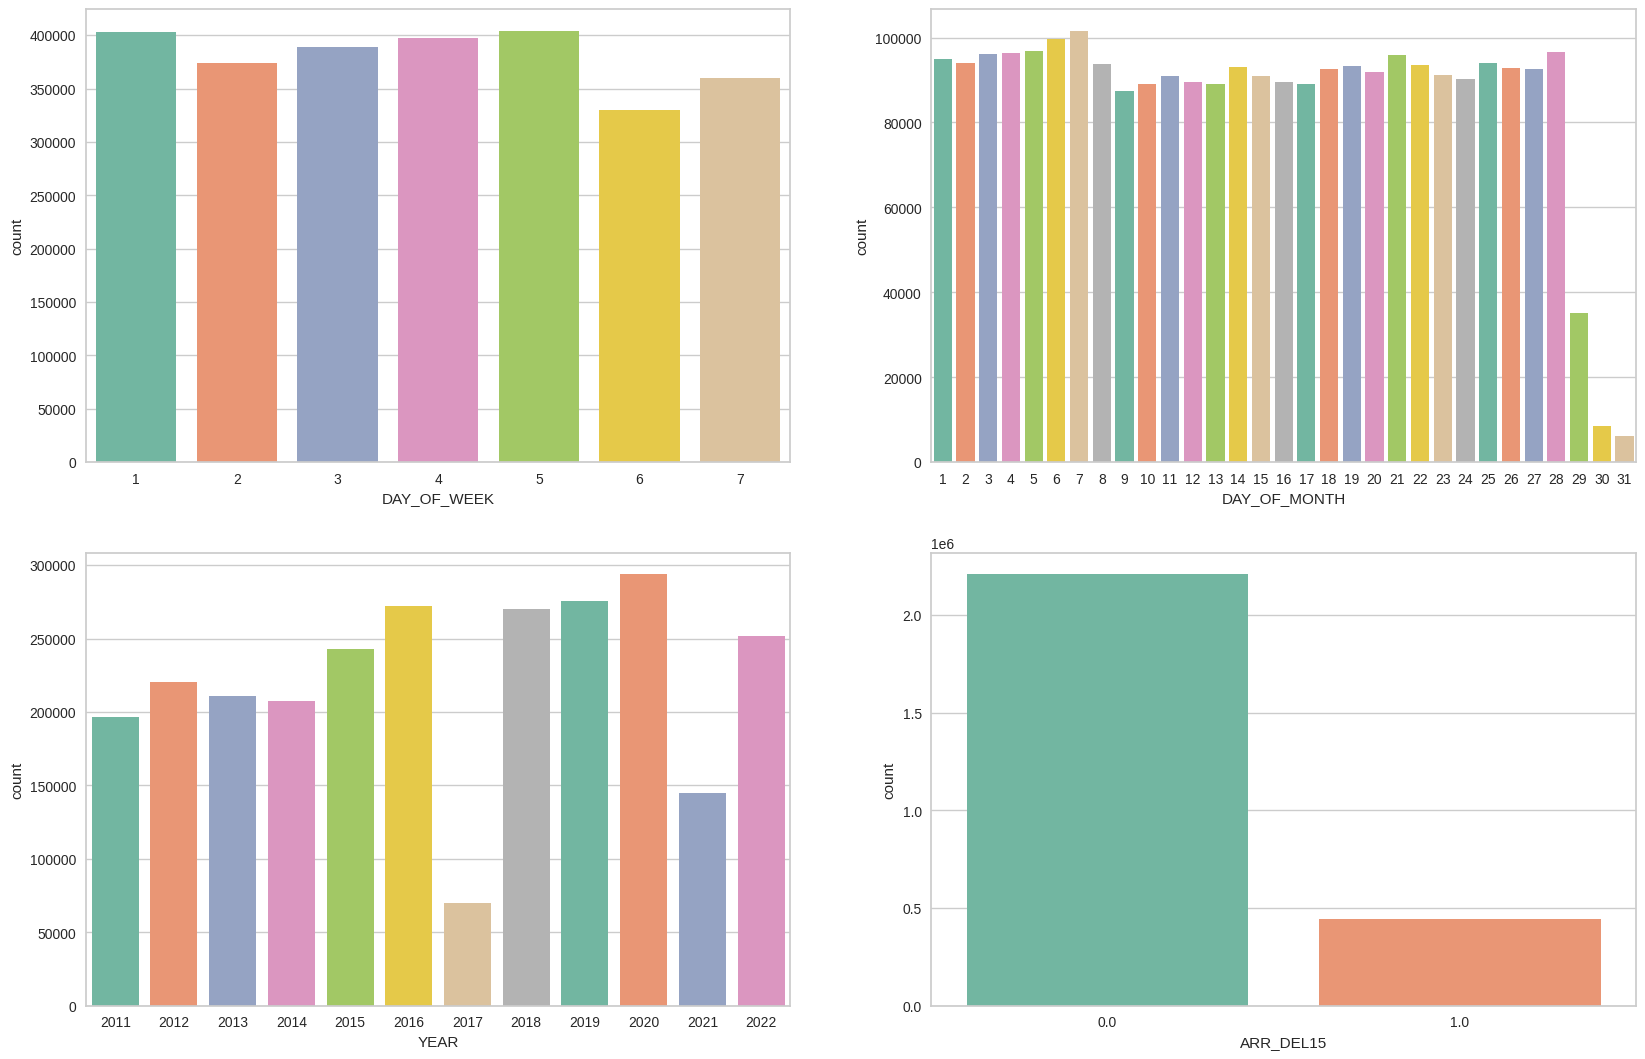

In [ ]:
plt.figure(figsize = (20,20))


plt.subplot(3,2,1)
sns.countplot(x = 'DAY_OF_WEEK', palette='Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'DAY_OF_MONTH', palette='Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'YEAR', palette='Set2', data = df)


plt.subplot(3,2,4)
sns.countplot(x = 'ARR_DEL15', palette='Set2', data = df)
plt.subplot(3,2,5)
sns.countplot(x = 'CARRIER_DELAY', palette='Set2', data = df)
plt.subplot(3,2,6)
sns.countplot(x = 'WEATHER_DELAY', palette='Set2', data = df)
plt.subplot(3,2,7)
sns.countplot(x = 'NAS_DELAY', palette='Set2', data = df)
plt.subplot(3,2,8)
sns.countplot(x = 'SECURITY_DELAY', palette='Set2', data = df)
plt.subplot(3,2,9)
sns.countplot(x = 'LATE_AIRCRAFT_DELAY', palette='Set2', data = df)


In [ ]:
df['ARR_DEL15'].value_counts()

0.0    2207568
1.0     444349
Name: ARR_DEL15, dtype: int64

In [ ]:
df['ORIGIN'].value_counts()

ATL    141889
DFW     77518
DEN     74822
LAX     64384
PHX     63522
        ...  
RAP        46
RDM        28
PSC        24
JNU        21
BMI        13
Name: ORIGIN, Length: 175, dtype: int64

In [ ]:
df['DEST'].value_counts()

ATL    209425
DFW    128941
DEN    110914
LAX    100947
ORD     97796
        ...  
MOT        25
PSC        24
JNU        21
BMI        20
OAJ         6
Name: DEST, Length: 178, dtype: int64

<ipython-input-34-184bd4e71aaf>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.DEP_TIME, kde = False)
<ipython-input-34-184bd4e71aaf>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.ARR_DELAY, kde = False)
<ipython-input-34-184bd4e71aaf>:10: UserWarning: 

`distplot` is a deprecated fun

<Axes: xlabel='CRS_DEP_TIME'>

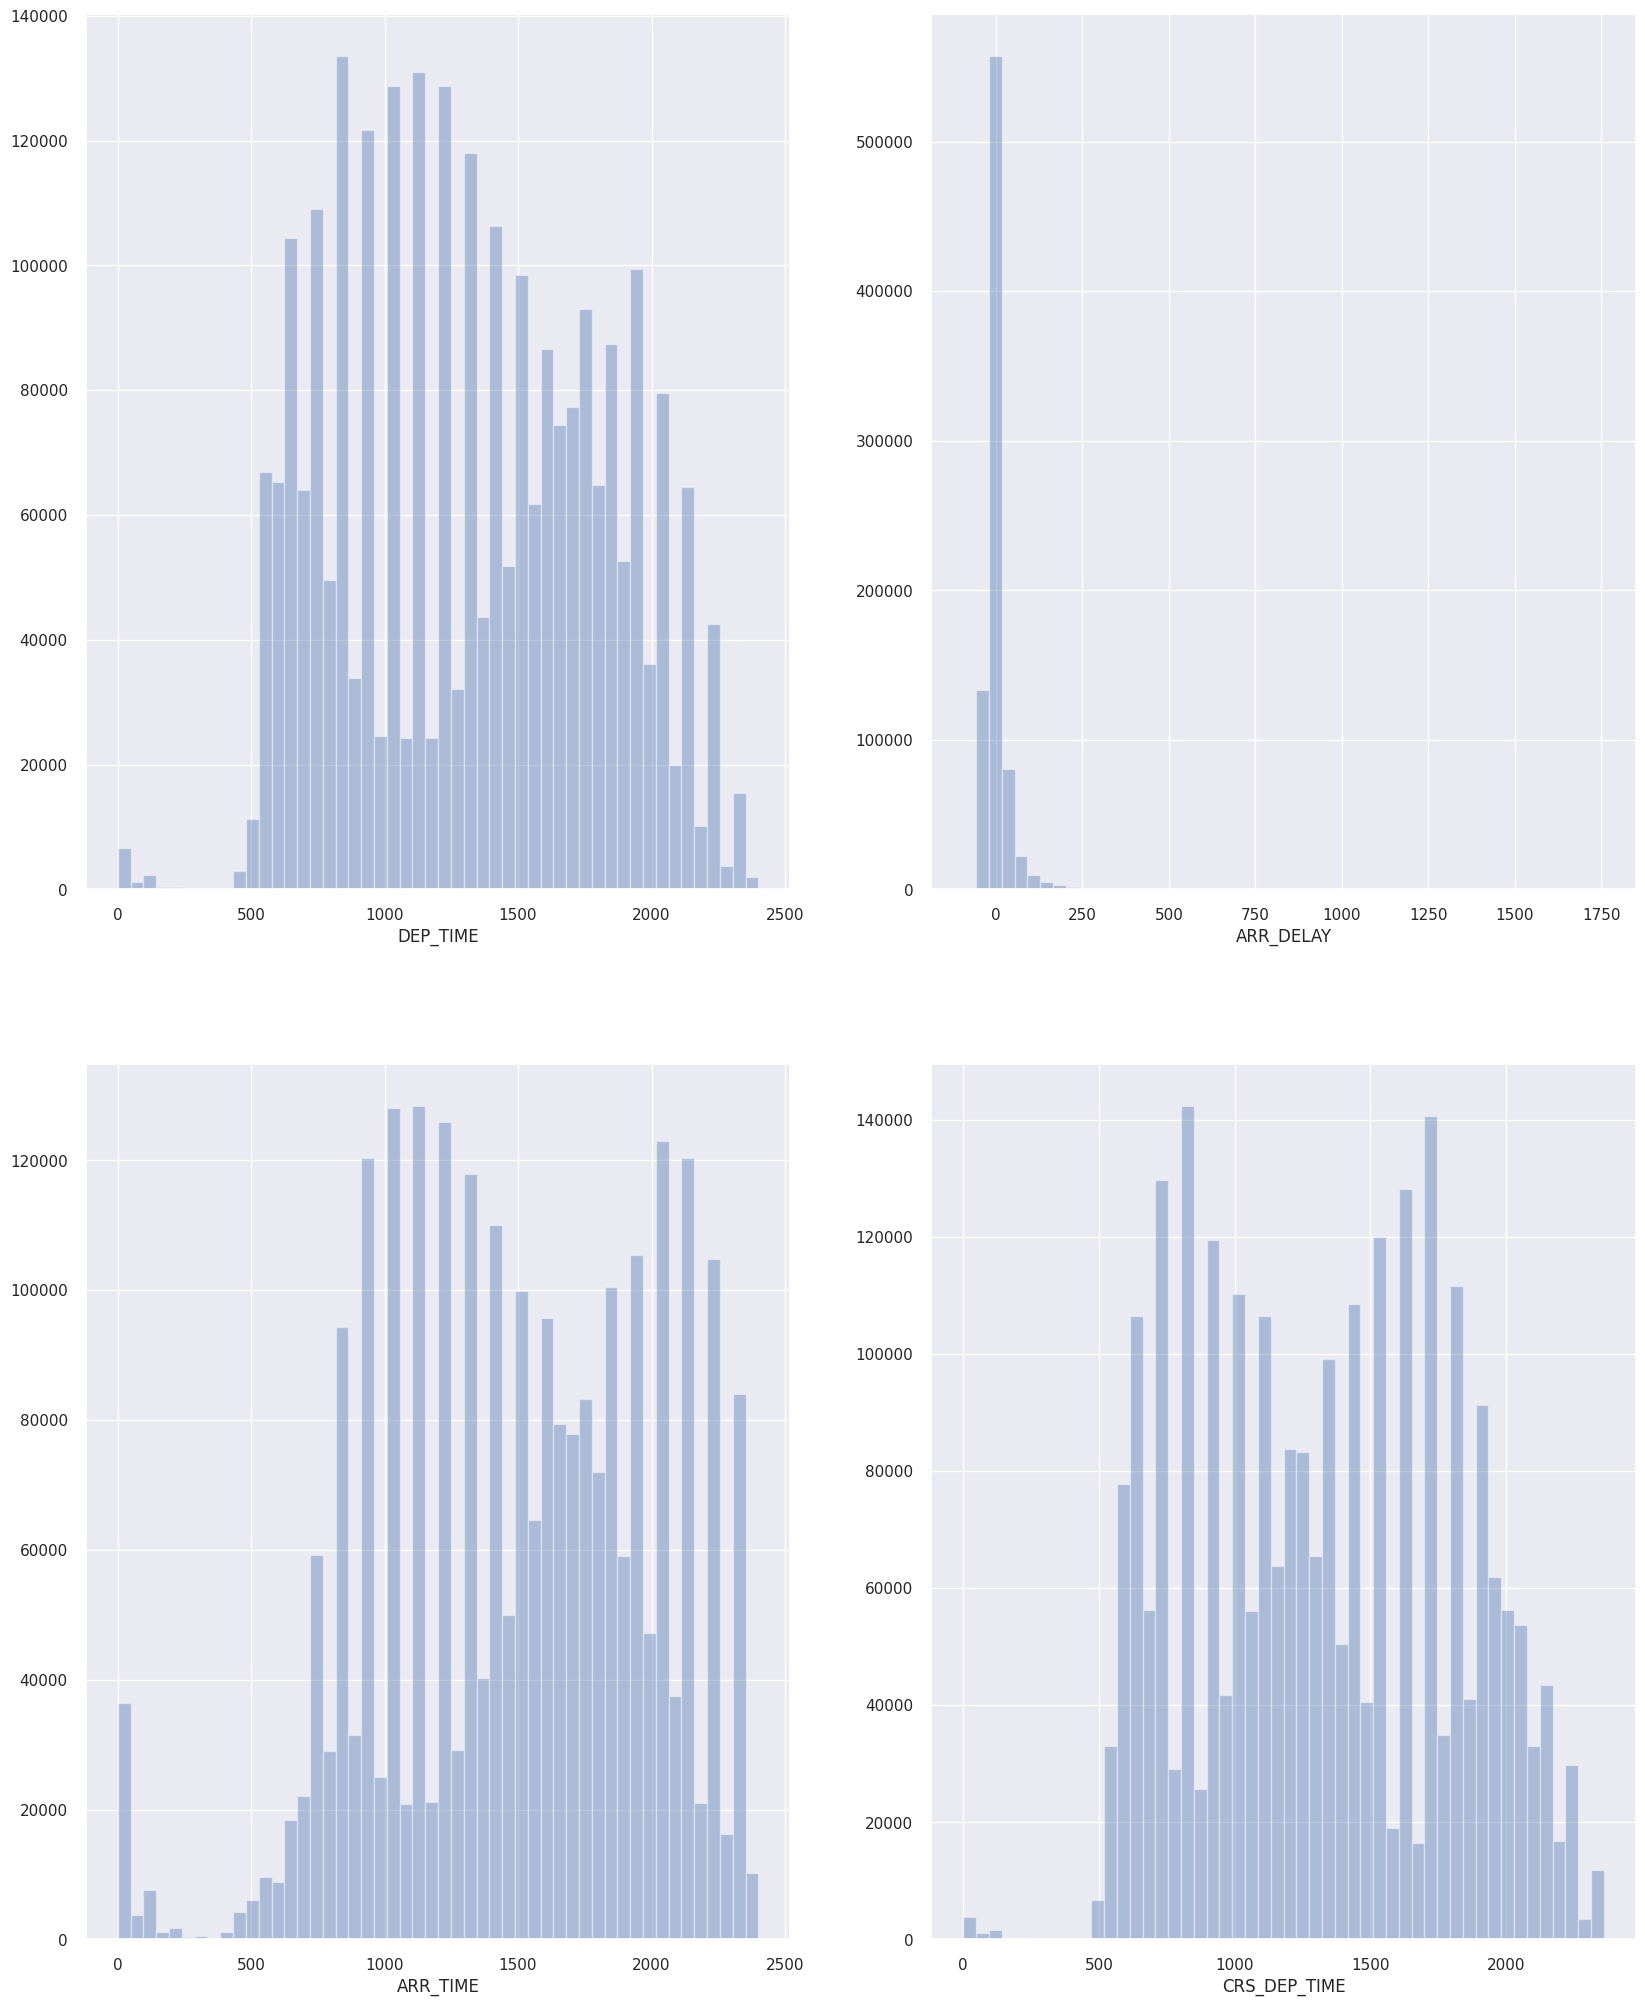

In [ ]:
plt.figure(figsize = (20,25))

sns.set(color_codes = True)

plt.subplot(2,2,1)
sns.distplot(df.DEP_TIME, kde = False)
plt.subplot(2,2,2)
sns.distplot(df.ARR_DELAY, kde = False)
plt.subplot(2,2,3)
sns.distplot(df.ARR_TIME, kde = False)
plt.subplot(2,2,4)
sns.distplot(df.CRS_DEP_TIME, kde = False)




<Axes: xlabel='DAY_OF_WEEK', ylabel='count'>

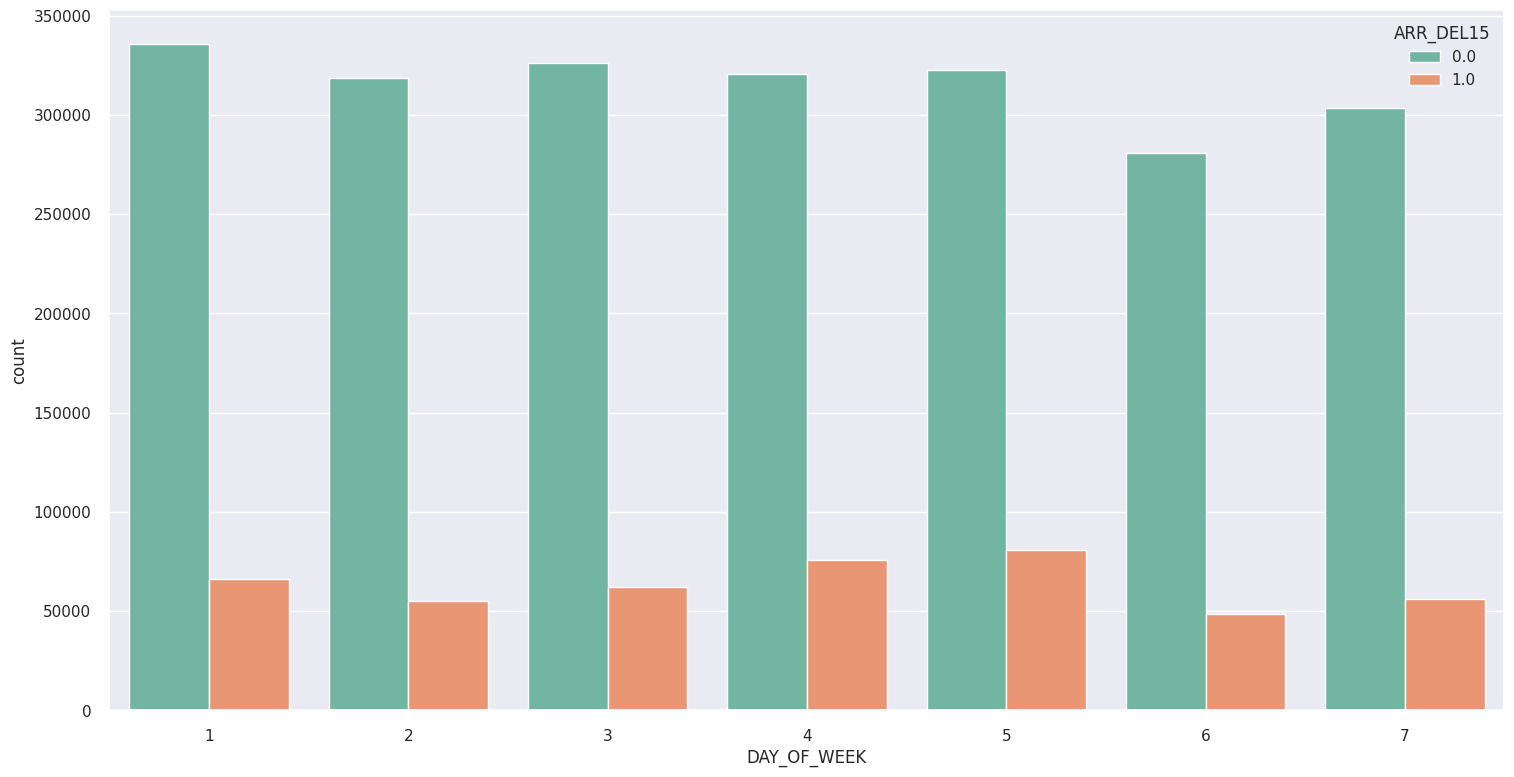

In [ ]:
plt.figure(figsize = (18,20))

plt.subplot(2,1,1)
sns.countplot(x = 'DAY_OF_WEEK', hue= 'ARR_DEL15', palette='Set2', data = df)



<Axes: xlabel='DAY_OF_MONTH', ylabel='count'>

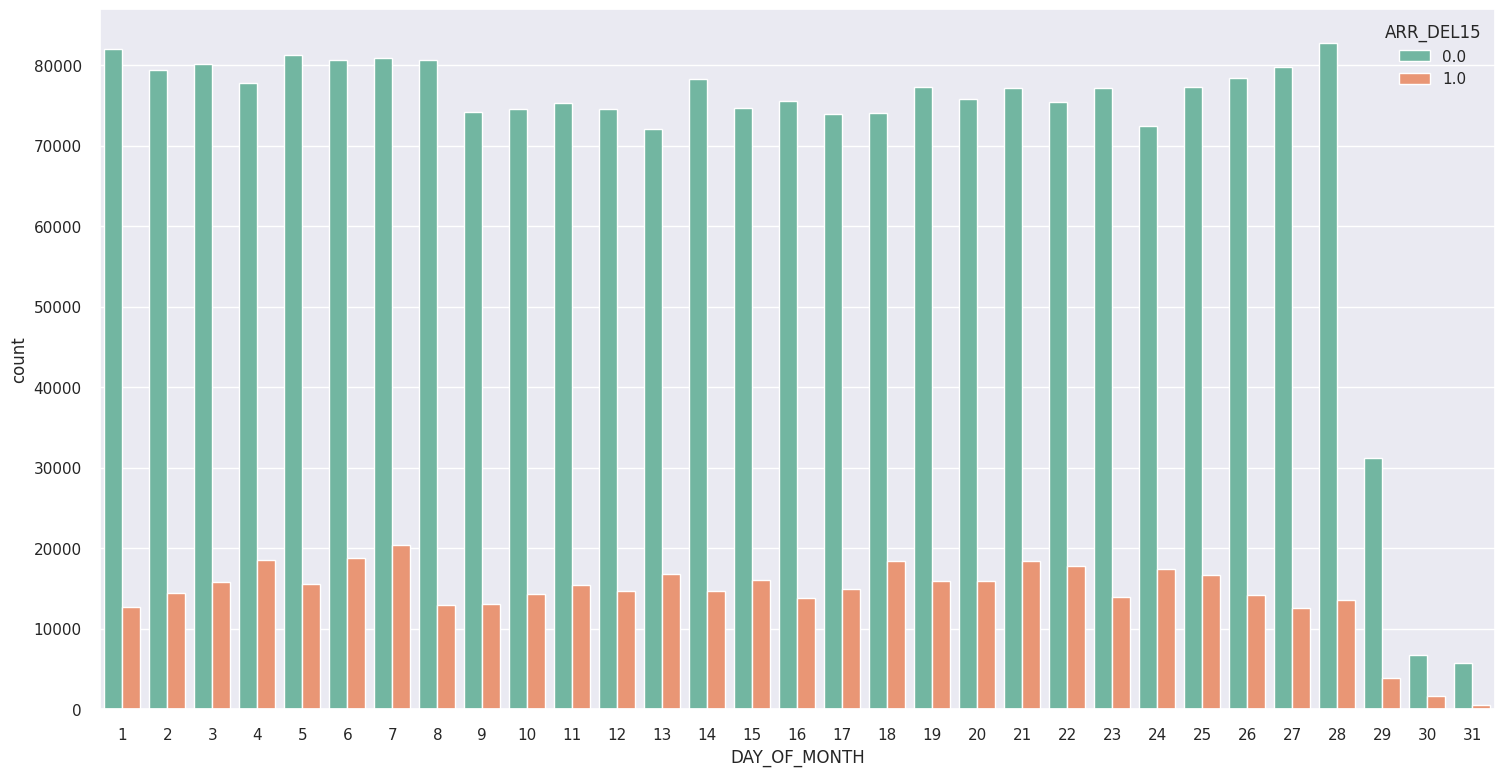

In [ ]:
plt.figure(figsize = (18,20))
plt.subplot(2,1,2)
sns.countplot(x = 'DAY_OF_MONTH', hue= 'ARR_DEL15', palette='Set2', data = df)

<Axes: xlabel='YEAR', ylabel='count'>

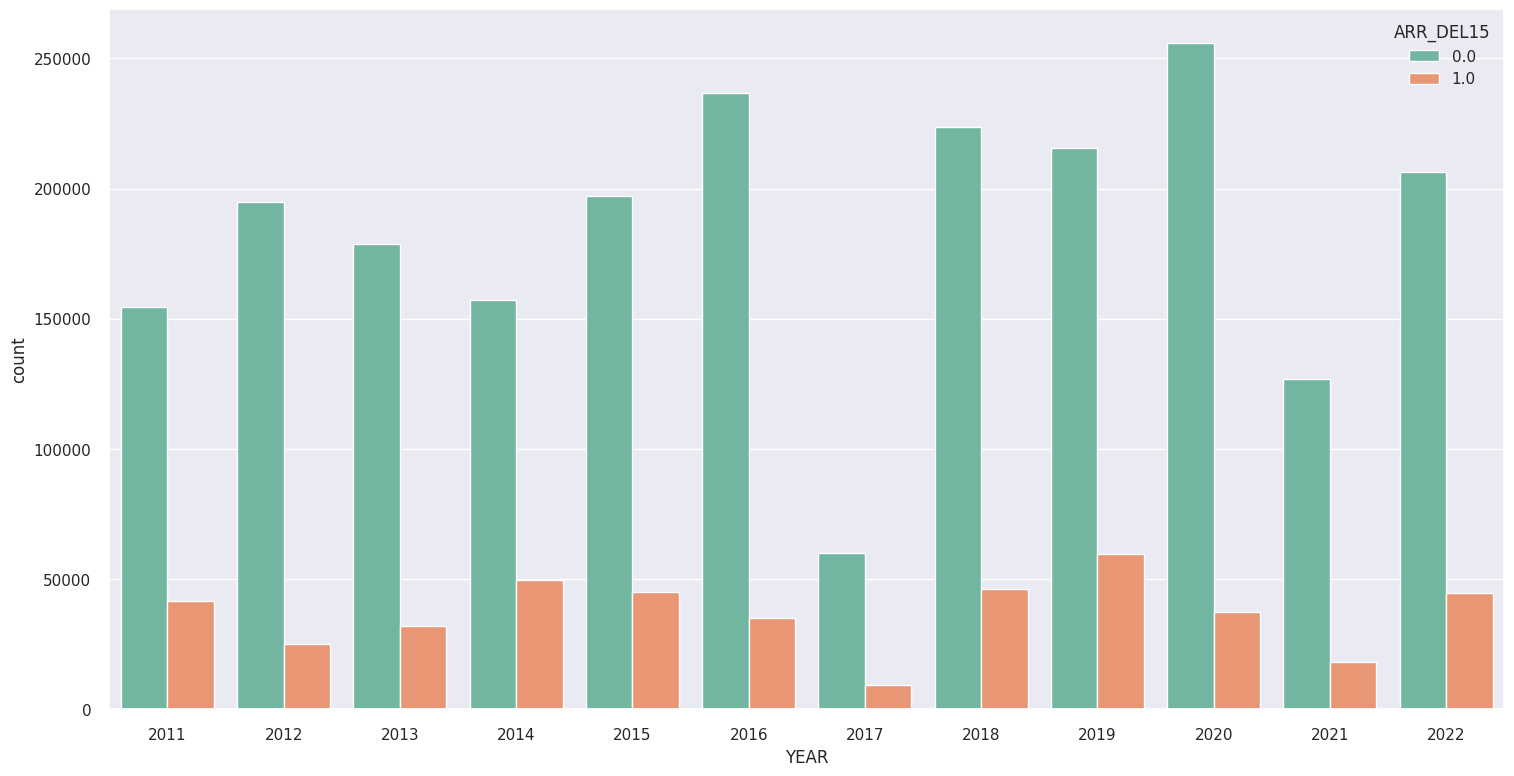

In [ ]:
plt.figure(figsize = (18,20))
plt.subplot(2,1,2)
sns.countplot(x = 'YEAR', hue= 'ARR_DEL15', palette='Set2', data = df)

<Axes: xlabel='OP_UNIQUE_CARRIER', ylabel='count'>

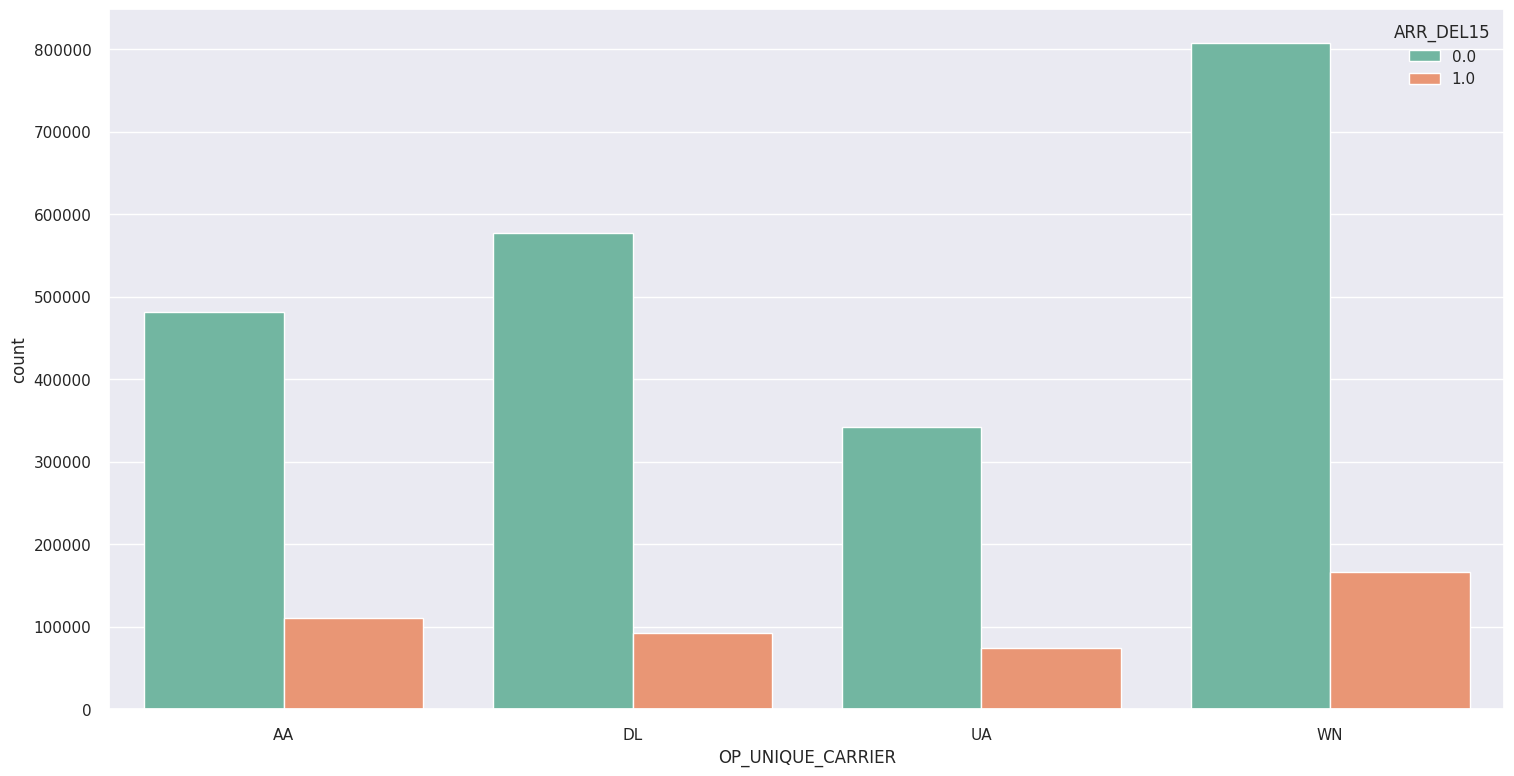

In [ ]:
plt.figure(figsize = (18,20))
plt.subplot(2,1,2)
sns.countplot(x = 'OP_UNIQUE_CARRIER', hue= 'ARR_DEL15', palette='Set2', data = df)


# 4 baseline methods

In [7]:
df=df.replace(np.nan, 0)
X=df.drop(['ARR_DELAY','ARR_DELAY_NEW','ARR_DEL15', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY','SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY' ], axis = 1)
train=df.drop(['ARR_DELAY', 'CARRIER_DELAY','ARR_DELAY_NEW', 'WEATHER_DELAY', 'NAS_DELAY','SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY' ], axis = 1)
train['ORIGIN'] = train['ORIGIN'].astype(str)
X['ORIGIN'] = X['ORIGIN'].astype(str)
Y1=df.ARR_DEL15


In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder_airportfrom = LabelEncoder()
label_encoder_airportto = LabelEncoder()
train = train.values


In [9]:
train[:,3] = label_encoder_airportfrom.fit_transform(train[:,3])
train[:,4] = label_encoder_airportto.fit_transform(train[:,4])
train[:,14] = label_encoder_airportto.fit_transform(train[:,14])
train


array([[2011, 1, 2, ..., 1.0, 0, 0],
       [2011, 1, 2, ..., 1.0, 0, 0],
       [2011, 1, 2, ..., 0.0, 0, 0],
       ...,
       [2022, 28, 1, ..., 0.0, 0, 174],
       [2022, 28, 1, ..., 0.0, 0, 174],
       [2022, 28, 1, ..., 0.0, 0, 174]], dtype=object)

## K-means to cluster at first

In [10]:
k_list = list(range(1,10))
k_values = dict(n_neighbors = k_list)
from sklearn.model_selection import GridSearchCV

In [11]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=14), k=(1, 15))

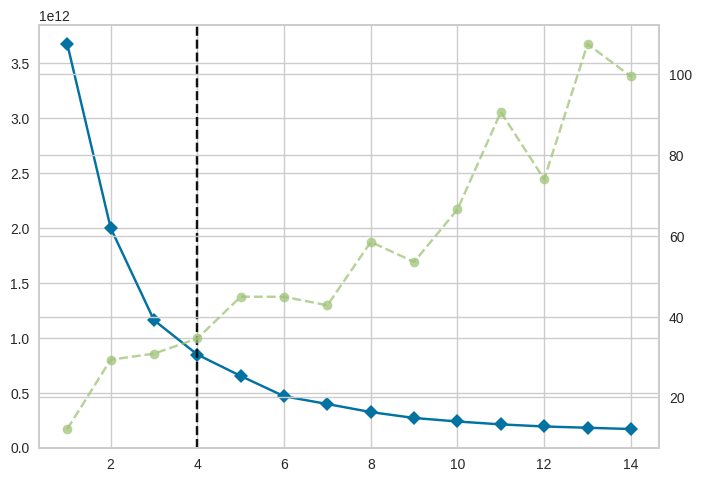

In [ ]:
kmeans_model = KMeans()
KElbowPlot = KElbowVisualizer(kmeans_model, k=(1,15))
KElbowPlot.fit(train)

In [12]:
kmeans_model = KMeans(n_clusters = 4, random_state = 0)
train=pd.DataFrame(train)
train.columns = train.columns.astype(str)
kmeans_model.fit(train)



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [23]:
train['cluster'] = kmeans_model.fit_predict(train)
cluster0 = train[train['cluster']==0]
cluster1 = train[train['cluster']==1]
cluster2 = train[train['cluster']==2]
cluster3 = train[train['cluster']==3]
print("cluster 0: ", len(cluster0))
print("cluster 1: ", len(cluster1))
print("cluster 2: ", len(cluster2))
print("cluster 3: ", len(cluster3))
train

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster 0:  886417
cluster 1:  904344
cluster 2:  461052
cluster 3:  404821


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,cluster
0,2011,1,2,0,1,1915,2002,47,1,2005.0,2155.0,110.0,1.0,0,0,1
1,2011,1,2,0,6,925,1021,56,1,1225.0,1349.0,84.0,1.0,0,0,0
2,2011,1,2,0,6,1015,1014,0,0,1215.0,1226.0,11.0,0.0,0,0,0
3,2011,1,2,0,6,1535,1533,0,0,1740.0,1739.0,0.0,0.0,0,0,1
4,2011,1,2,0,6,1940,1945,5,0,2145.0,2149.0,4.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656629,2022,28,1,3,18,725,722,0,0,855.0,837.0,0.0,0.0,0,174,0
2656630,2022,28,1,3,18,1025,1023,0,0,1145.0,1146.0,1.0,0.0,0,174,0
2656631,2022,28,1,3,18,1700,1656,0,0,1820.0,1811.0,0.0,0.0,0,174,1
2656632,2022,28,1,3,26,1500,1456,0,0,1830.0,1818.0,0.0,0.0,0,174,1


So, there are 886417 data points belonging to cluster 4 (index 3), 904344 points in cluster 3 (index 2), 461052 points in cluster 2 (index 1)and 404821 points in cluster 1 (index 0). This is how we can implement K-Means Clustering in Python.

In [14]:
train.sort_values(by=['cluster'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,cluster
2656633,2022,28,1,3,42,1135,1137,2,0,1350.0,1339.0,0.0,0.0,0,174,0
2261334,2021,1,1,1,118,1100,1054,0,0,1239.0,1218.0,0.0,0.0,0,7,0
2261333,2021,1,1,1,118,940,937,0,0,1121.0,1114.0,0.0,0.0,0,7,0
2261332,2021,1,1,1,118,805,804,0,0,943.0,939.0,0.0,0.0,0,7,0
2261329,2021,1,1,1,113,1220,1215,0,0,1348.0,1344.0,0.0,0.0,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802090,2019,12,2,2,80,1045,1035,0,0,0.0,1816.0,0.0,0.0,0,153,3
1802092,2019,12,2,2,80,1655,1648,0,0,0.0,44.0,0.0,0.0,0,153,3
1802095,2019,12,2,2,81,50,133,43,1,0.0,700.0,35.0,1.0,0,153,3
1802097,2019,12,2,2,81,950,958,8,0,0.0,1531.0,0.0,0.0,0,153,3


Revise the data and make it more predictable.

In [15]:
train1 = train.drop(['cluster'], axis = 1)

In [16]:
y=train1['12']
x=train1.drop(['12'], axis = 1)
y=y.astype('int')


In [17]:
#Split the dataset into training and testing data

x_train_original, x_test_original, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

xcol = x_train_original.columns
ycol = "delay_15mins"


## Standardize the data

In [18]:
from sklearn import preprocessing
x_train = preprocessing.scale(x_train_original)
x_train=pd.DataFrame(x_train)
x_test = preprocessing.scale(x_test_original)
x_test=pd.DataFrame(x_test)


## 1. Decision Tree

In [ ]:
# Define the decision tree classifier
dtc = DecisionTreeClassifier()

# Define the hyperparameters to be searched
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(dtc, param_grid=params, cv=5)
grid_search.fit(x_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}
Best score:  1.0


 ### DecisionTreeClassifier is fitted

In [ ]:
dtc_best_param = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = 1, min_samples_leaf = 1)
dtc_best_param.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, '11 <= 0.111\ngini = 0.279\nsamples = 1859643\nvalue = [1548435, 311208]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1548435\nvalue = [1548435, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 311208\nvalue = [0, 311208]')]

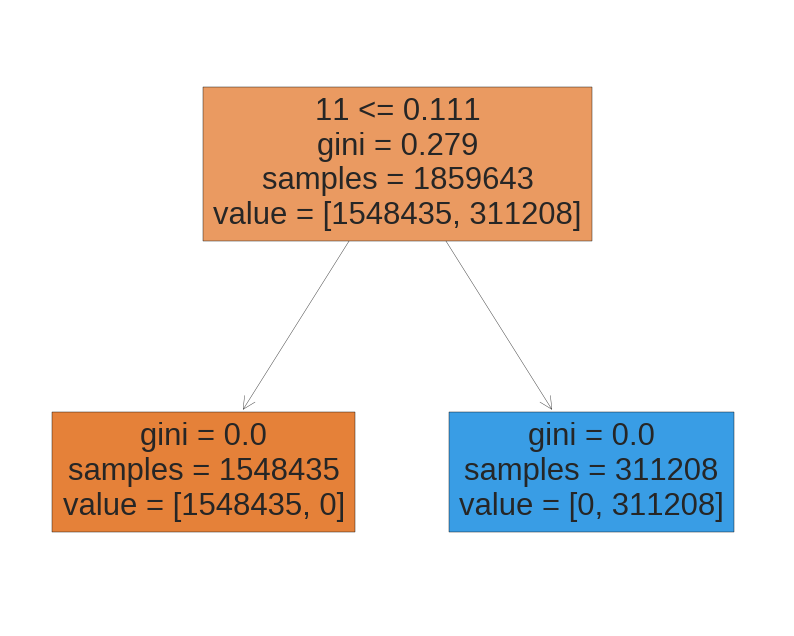

In [ ]:
# plot tree classifier
plt.figure(figsize=(10,8))
plot_tree(dtc_best_param,feature_names=list(x_train.columns), filled=True)

### Evaluating the Peformance

Accuracy: 1.0
Precision: 1.0
F1 score: 1.0
Confusion Matrix: 
 [[663850      0]
 [     0 133141]]


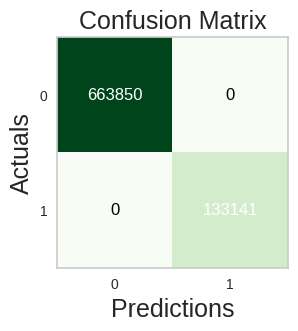

In [ ]:
#!pip install sklearn
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Make predictions on the test data
dtc_predict = dtc_best_param.predict(x_test)

# Performance of the model
accuracy = accuracy_score(y_test, dtc_predict)
precision = precision_score(y_test, dtc_predict, average='weighted')
f1 = f1_score(y_test, dtc_predict, average='weighted')

# confusion matrix
conf_mat = confusion_matrix(y_test, dtc_predict)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 score:", f1)
print("Confusion Matrix: \n", conf_mat)

#Plot confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, figsize=(3, 3), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Overall, the classifier achieved an accuracy of 1


### K-fold validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(x_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    dtc_best_param.fit(x_train.iloc[train, :], y_train.iloc[train])
    score = dtc_best_param.score(x_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: ', k+1, 'Accuracy:', score)
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1 Accuracy: 1.0
Fold:  2 Accuracy: 1.0
Fold:  3 Accuracy: 1.0
Fold:  4 Accuracy: 1.0
Fold:  5 Accuracy: 1.0
Fold:  6 Accuracy: 1.0
Fold:  7 Accuracy: 1.0
Fold:  8 Accuracy: 1.0
Fold:  9 Accuracy: 1.0
Fold:  10 Accuracy: 1.0


Cross-Validation accuracy: 1.000 +/- 0.000


## 2. Random Forest

 ### RandomForestClassifier is fitted 

In [ ]:
dtc_best_param = RandomForestClassifier(criterion = 'gini',n_estimators= 200, max_depth = 1, min_samples_leaf = 1)
dtc_best_param.fit(x_train, y_train)

RandomForestClassifier(max_depth=1, n_estimators=200)

### Evaluating the Peformance

Accuracy: 0.9462264944020697
Precision: 0.9494874938394753
F1 score: 0.9419098661638589
Confusion Matrix: 
 [[663850      0]
 [ 42857  90284]]


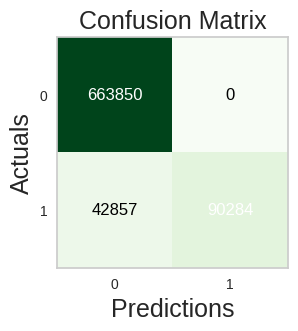

In [ ]:
#!pip install sklearn
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Make predictions on the test data
dtc_predict = dtc_best_param.predict(x_test)

# Performance of the model
accuracy = accuracy_score(y_test, dtc_predict)
precision = precision_score(y_test, dtc_predict, average='weighted')
f1 = f1_score(y_test, dtc_predict, average='weighted')

# confusion matrix
conf_mat = confusion_matrix(y_test, dtc_predict)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 score:", f1)
print("Confusion Matrix: \n", conf_mat)

#Plot confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, figsize=(3, 3), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Overall, the classifier achieved an accuracy of 0.9462264944020697


### K-fold validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(x_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    dtc_best_param.fit(x_train.iloc[train, :], y_train.iloc[train])
    score = dtc_best_param.score(x_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: ', k+1, 'Accuracy:', score)
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

KeyboardInterrupt: ignored

## 3. Multiple Linear Regression

Coefficients:  [-1.20328445e-03 -3.46974183e-05  6.67244178e-05 -3.04257705e-04
  1.23019673e-03 -5.39993959e-02  6.31530442e-02 -4.81520648e-01
  2.56687557e-01  2.44213793e-05 -9.08562741e-04  5.43410881e-01
  0.00000000e+00 -2.74704217e-04]
Variance score: 0.6522507918763354


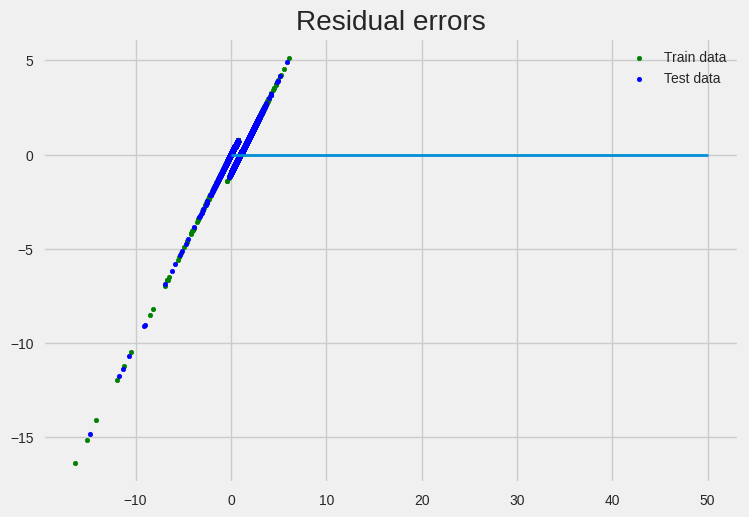

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
  

from sklearn.model_selection import train_test_split


  
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(x_train, y_train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(x_test, y_test)))
  
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(reg.predict(x_train), reg.predict(x_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(reg.predict(x_test), reg.predict(x_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()


In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, reg.predict(x_test)), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, reg.predict(x_test)), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, reg.predict(x_test)), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, reg.predict(x_test)), 2)) 
print("R2 score =", round(sm.r2_score(y_test, reg.predict(x_test)), 2))


Mean absolute error = 0.12
Mean squared error = 0.05
Median absolute error = 0.04
Explain variance score = 0.65
R2 score = 0.65


### K-fold validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(x_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    reg.fit(x_train.iloc[train, :], y_train.iloc[train])
    score = reg.score(x_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: ', k+1, 'Accuracy:', score)
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1 Accuracy: 0.6421363591399857
Fold:  2 Accuracy: 0.6617845195647052
Fold:  3 Accuracy: 0.6564892431194724
Fold:  4 Accuracy: 0.6606394329182985
Fold:  5 Accuracy: 0.65484107865259
Fold:  6 Accuracy: 0.6415324621700871
Fold:  7 Accuracy: 0.6645500429086871
Fold:  8 Accuracy: 0.6388750451387251
Fold:  9 Accuracy: 0.6606453019283929
Fold:  10 Accuracy: 0.6629416811225839


Cross-Validation accuracy: 0.654 +/- 0.009


## 4. Logistic Regression

1.0

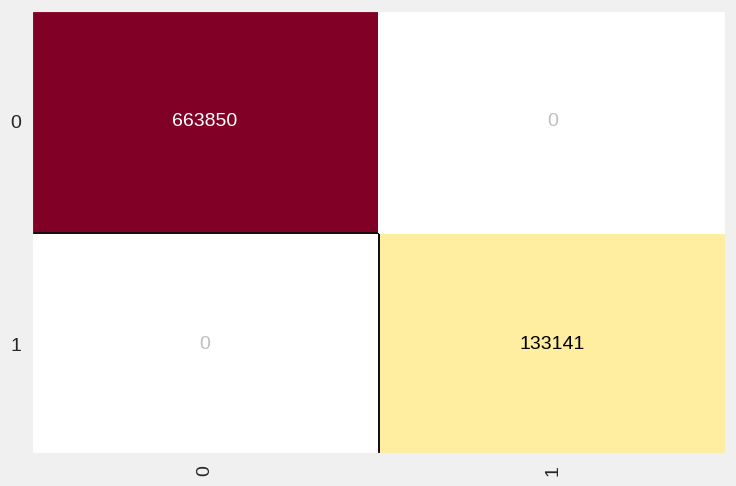

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 1)
logistic.fit(x_train, y_train)
previsoes = logistic.predict(x_test)
cm = ConfusionMatrix(logistic)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)


In [ ]:
logistic_normal = (classification_report(y_test, previsoes))
print(logistic_normal)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    663850
           1       1.00      1.00      1.00    133141

    accuracy                           1.00    796991
   macro avg       1.00      1.00      1.00    796991
weighted avg       1.00      1.00      1.00    796991



### Evaluation

Accuracy: 1.0
Precision: 1.0
F1 score: 1.0
Confusion Matrix: 
 [[663850      0]
 [     0 133141]]


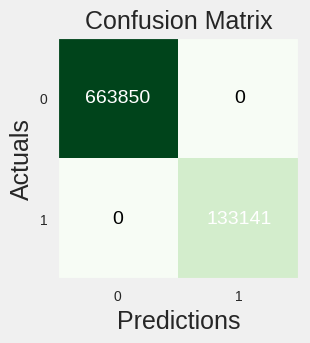

In [ ]:
#!pip install sklearn
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Make predictions on the test data
dtc_predict = logistic.predict(x_test)

# Performance of the model
accuracy = accuracy_score(y_test, dtc_predict)
precision = precision_score(y_test, dtc_predict, average='weighted')
f1 = f1_score(y_test, dtc_predict, average='weighted')

# confusion matrix
conf_mat = confusion_matrix(y_test, dtc_predict)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 score:", f1)
print("Confusion Matrix: \n", conf_mat)

#Plot confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, figsize=(3, 3), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### K-fold validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(x_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    logistic.fit(x_train.iloc[train, :], y_train.iloc[train])
    score = logistic.score(x_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: ', k+1, 'Accuracy:', score)
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1 Accuracy: 1.0
Fold:  2 Accuracy: 1.0
Fold:  3 Accuracy: 1.0
Fold:  4 Accuracy: 1.0
Fold:  5 Accuracy: 1.0
Fold:  6 Accuracy: 1.0
Fold:  7 Accuracy: 1.0
Fold:  8 Accuracy: 1.0
Fold:  9 Accuracy: 1.0
Fold:  10 Accuracy: 1.0


Cross-Validation accuracy: 1.000 +/- 0.000


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(x_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    knn.fit(x_train.iloc[train, :], y_train.iloc[train])
    score = knn.score(x_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: ', k+1, 'Accuracy:', score)
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

# Creative solution: Natural Language Processing (NLP)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tweets.csv to tweets.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2015.csv to 2015.csv


In [ ]:
# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud,STOPWORDS
from nltk import SnowballStemmer


from sklearn.model_selection import train_test_split # Split Data 
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics  


# Data Visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings   


warnings.filterwarnings('ignore')
%matplotlib inline

## Read the data

In [ ]:
import pandas as pd
import numpy as np
df_2015 = pd.read_csv('/content/2015.csv')
df_tweet = pd.read_csv('/content/tweets.csv')
df=df_tweet
df_tweet.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,DAY_OF_MONTH,tweet_location,user_timezone
0,5.703080e+17,positive,1.0000,NaN,NaN,United,NaN,rdowning76,NaN,0,@united thanks,NaN,2/24/2015 11:42,24,usa,NaN
1,5.703080e+17,positive,1.0000,NaN,NaN,United,NaN,CoreyAStewart,NaN,0,@united Thanks for taking care of that MR!! Ha...,NaN,2/24/2015 11:42,24,"Richmond, VA",Eastern Time (US & Canada)
2,5.703070e+17,negative,1.0000,Cancelled Flight,0.703,United,NaN,CoralReefer420,NaN,0,@united still no refund or word via DM. Please...,NaN,2/24/2015 11:39,24,"Bay Area, California",Alaska
3,5.703070e+17,negative,1.0000,Late Flight,1.000,United,NaN,lsalazarll,NaN,0,@united Delayed due to lack of crew and now de...,NaN,2/24/2015 11:39,24,NaN,Mountain Time (US & Canada)
4,5.703070e+17,positive,0.3441,NaN,0.000,United,NaN,rombaa,NaN,0,@united thanks -- we filled it out. How's our ...,NaN,2/24/2015 11:38,24,NaN,NaN


In [ ]:
df_tweet.nunique()

tweet_id                         2333
airline_sentiment                   3
airline_sentiment_confidence      962
negativereason                     10
negativereason_confidence        1320
airline                             4
airline_sentiment_gold              3
name                             5949
negativereason_gold                13
retweet_count                      14
text                            11018
tweet_coord                       679
tweet_created                    5911
DAY_OF_MONTH                        9
tweet_location                   2471
user_timezone                      78
dtype: int64

In [ ]:
df_tweet['tweet_created'] = pd.to_datetime(df_tweet['tweet_created']).dt.date
df_tweet['tweet_created'] = pd.to_datetime(df_tweet['tweet_created'])
df_tweet['tweet_created'].nunique()
numberoftweets = df.groupby('tweet_created').size()
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  40.00
negativereason_confidence       30.33
airline                          0.00
airline_sentiment_gold          99.67
name                             0.00
negativereason_gold             99.73
retweet_count                    0.00
text                             0.00
tweet_coord                     92.68
tweet_created                    0.00
DAY_OF_MONTH                     0.00
tweet_location                  31.56
user_timezone                   32.37
dtype: float64

In [ ]:
del df['tweet_coord']
del df['airline_sentiment_gold']
del df['negativereason_gold']
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,DAY_OF_MONTH,tweet_location,user_timezone
0,5.703080e+17,positive,1.0000,NaN,NaN,United,rdowning76,0,@united thanks,2015-02-24,24,usa,NaN
1,5.703080e+17,positive,1.0000,NaN,NaN,United,CoreyAStewart,0,@united Thanks for taking care of that MR!! Ha...,2015-02-24,24,"Richmond, VA",Eastern Time (US & Canada)
2,5.703070e+17,negative,1.0000,Cancelled Flight,0.703,United,CoralReefer420,0,@united still no refund or word via DM. Please...,2015-02-24,24,"Bay Area, California",Alaska
3,5.703070e+17,negative,1.0000,Late Flight,1.000,United,lsalazarll,0,@united Delayed due to lack of crew and now de...,2015-02-24,24,NaN,Mountain Time (US & Canada)
4,5.703070e+17,positive,0.3441,NaN,0.000,United,rombaa,0,@united thanks -- we filled it out. How's our ...,2015-02-24,24,NaN,NaN


Reasons Of Negative Tweets : green
Customer Service Issue         2039
Late Flight                    1195
Can't Tell                      922
Cancelled Flight                640
Lost Luggage                    565
Bad Flight                      457
Flight Booking Problems         379
Flight Attendant Complaints     353
longlines                       125
Damaged Luggage                  59
Name: negativereason, dtype: int64


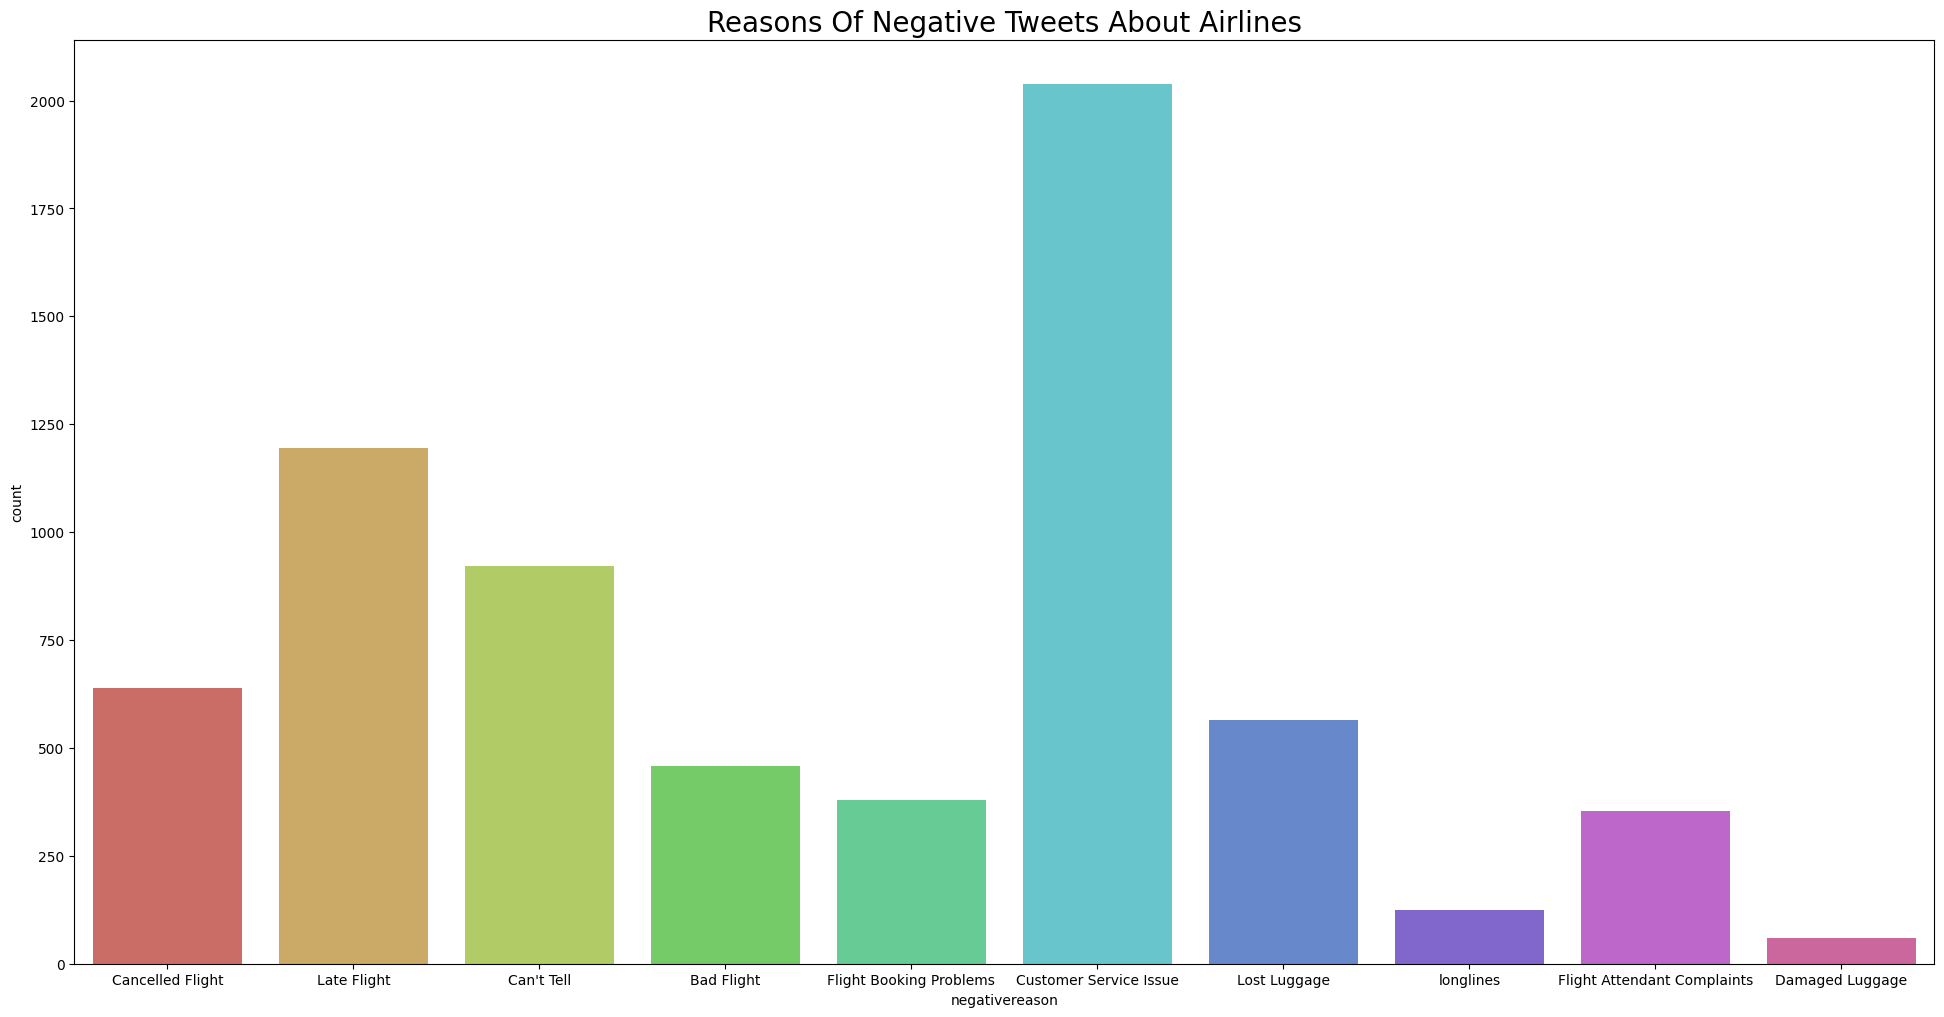

In [ ]:
print('Reasons Of Negative Tweets :','green')
print(df.negativereason.value_counts())

plt.figure(figsize = (24, 12))
sns.countplot(x = 'negativereason', data = df, palette = 'hls')
plt.title('Reasons Of Negative Tweets About Airlines', fontsize = 20)
plt.show()

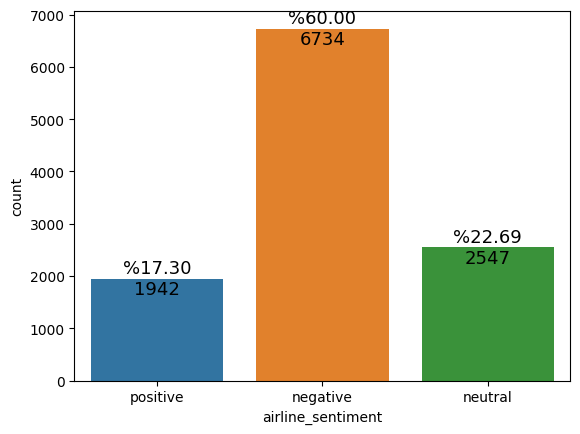

In [ ]:
def labels(ax, df, xytext=(0, 0)):
    for bar in ax.patches: 
        ax.annotate('%{:.2f}\n{:.0f}'.format(100*bar.get_height()/len(df),bar.get_height()), (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                    size=13, xytext=xytext, 
                    textcoords='offset points')

ax = sns.countplot(data =df, x = "airline_sentiment");
labels(ax, df)
# inbalanced data

Total number of tweets for each airline 
  airline
United       3822
American     2759
Southwest    2420
Delta        2222
Name: airline_sentiment, dtype: int64


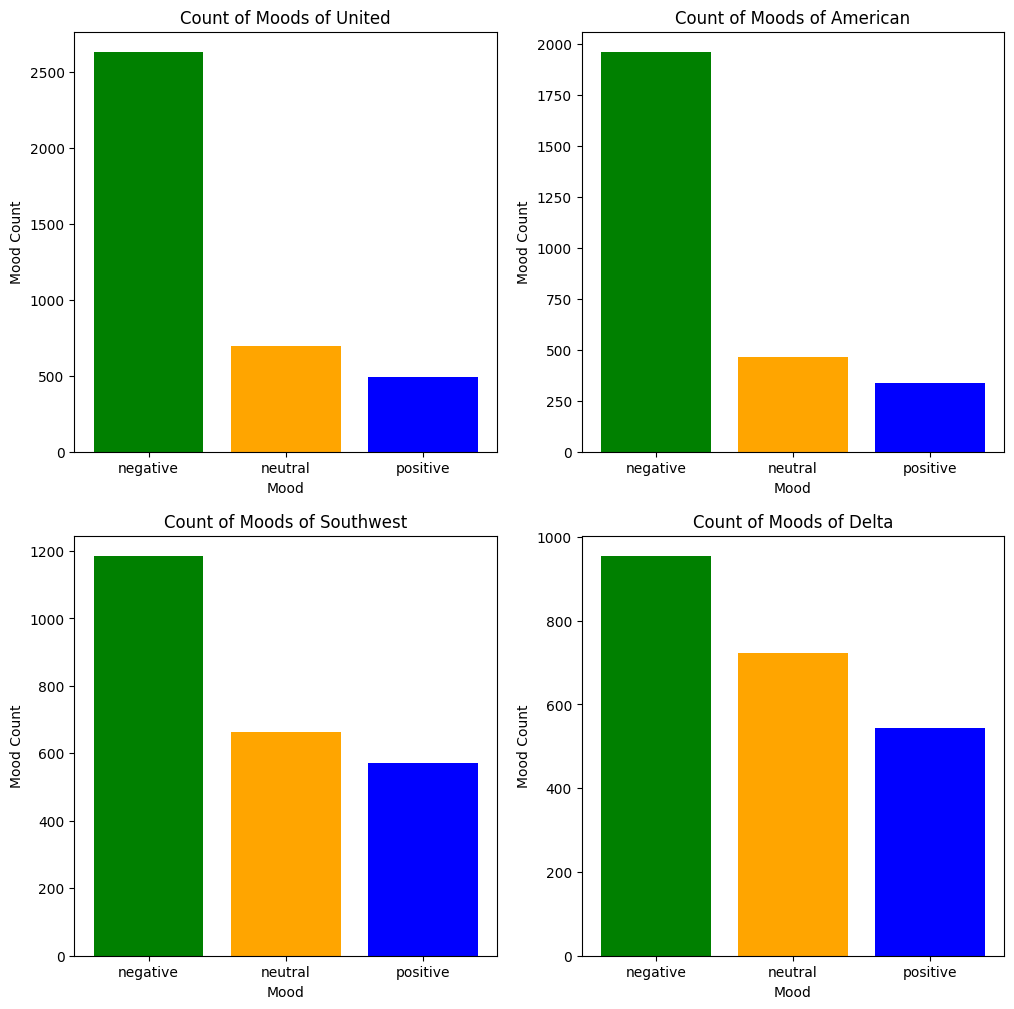

In [ ]:
print("Total number of tweets for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['United','American','Southwest','Delta']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,2,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['green','orange','blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

In [ ]:
date = df.reset_index()
#convert the Date column to pandas datetime
date.tweet_created = pd.to_datetime(date.tweet_created)
#Reduce the dates in the date column to only the date and no time stamp using the 'dt.date' method
date.tweet_created = date.tweet_created.dt.date
date.tweet_created.head()
df = date
day_df = df.groupby(['tweet_created','airline','airline_sentiment']).size()
# day_df = day_df.reset_index()


## World Cloud

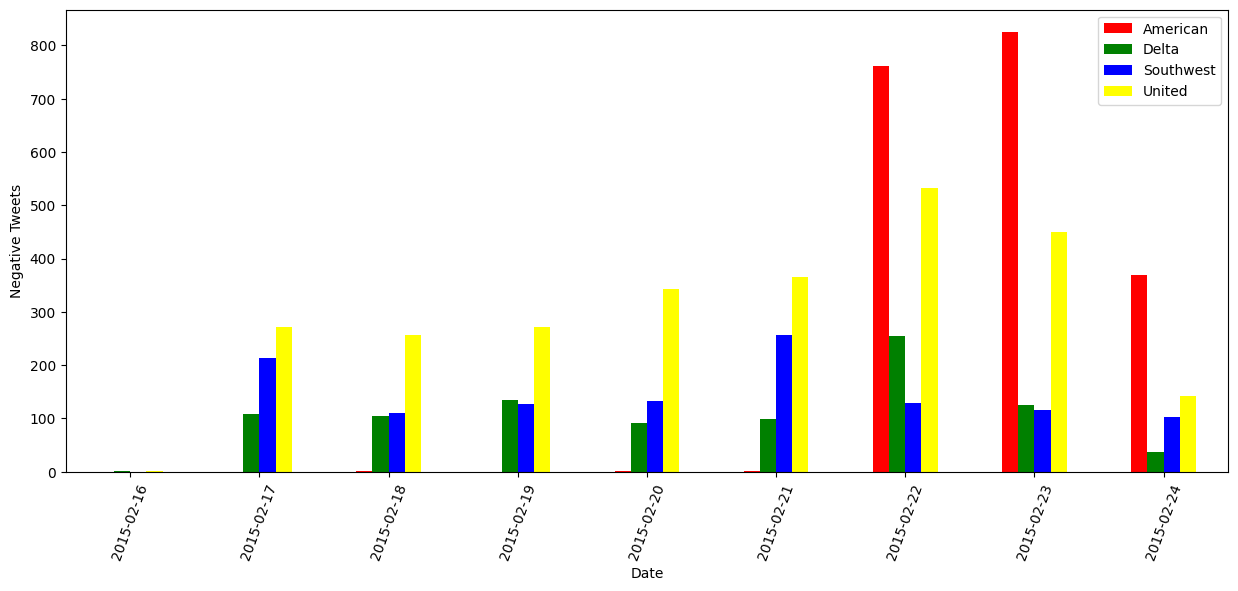

In [ ]:
day_df = day_df.loc(axis=0)[:,:,'negative']

#groupby and plot data
ax2 = day_df.groupby(['tweet_created','airline']).sum().unstack().plot(kind = 'bar', color=['red', 'green', 'blue','yellow','purple','orange'], figsize = (15,6), rot = 70)
labels = ['American','Delta','Southwest','United']

ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Tweets')
plt.show()

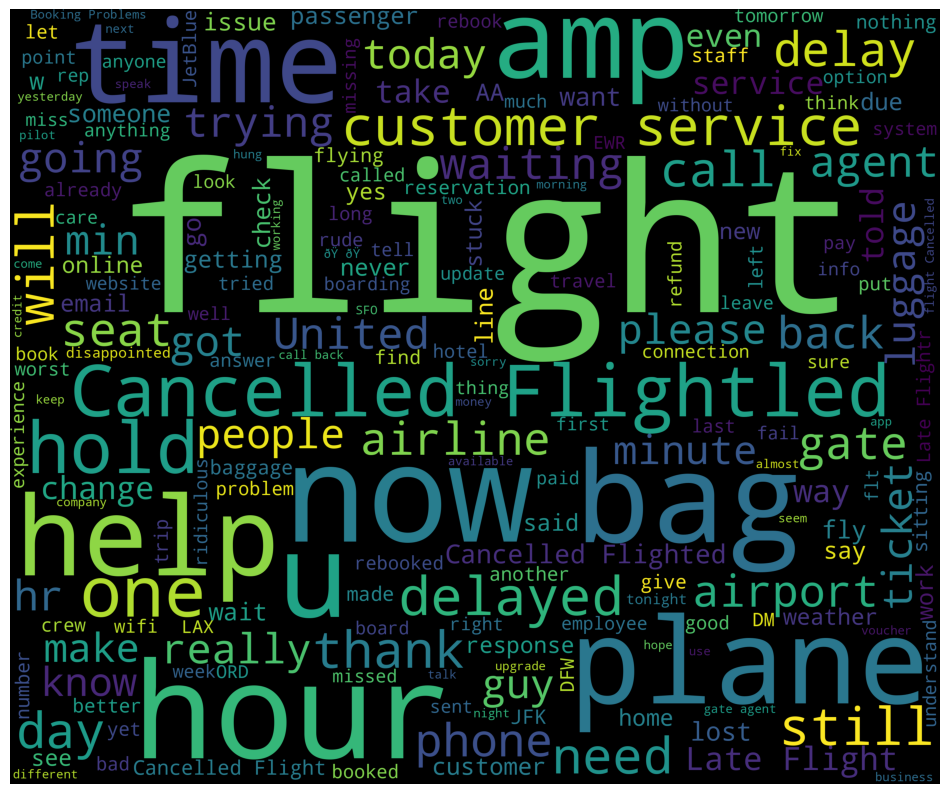

In [ ]:
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

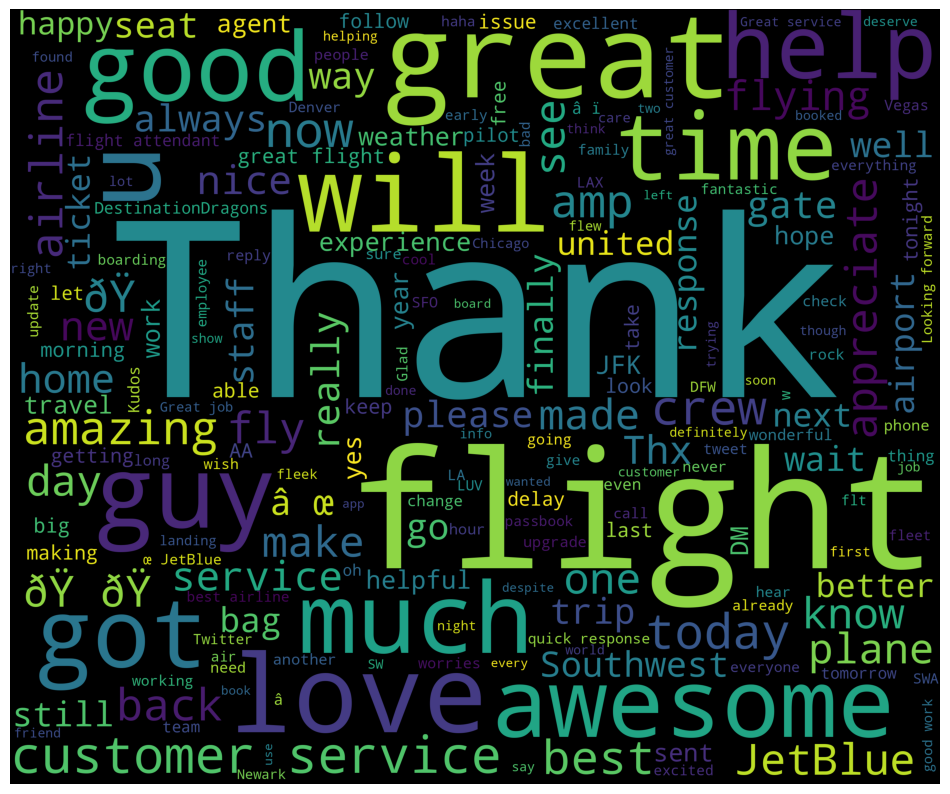

In [ ]:
new_df=df[df['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

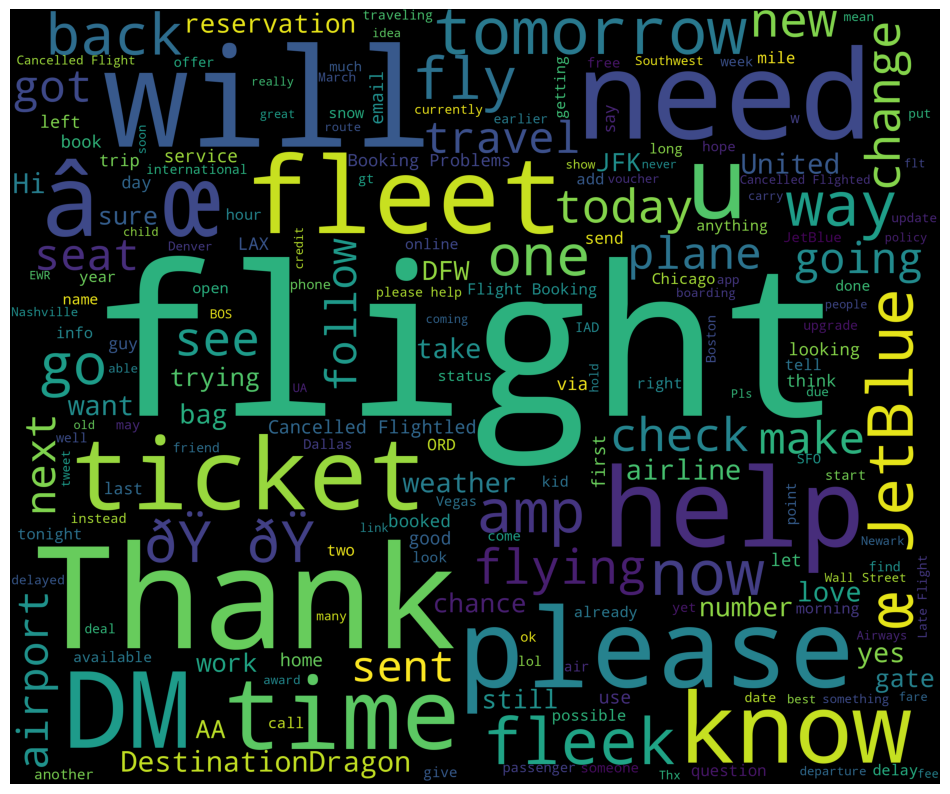

In [ ]:
new_df=df[df['airline_sentiment']=='neutral']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Predict

In [ ]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
from textblob import TextBlob
def get_tweet_sentiment(tweet): 
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity 
df['emotion score']=df['text'].apply(lambda x: get_tweet_sentiment(' '.join(x)))


In [ ]:
dff=df
dff_2015=df_2015
df_2015

,YEAR,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_DEL15,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2015,1,4,AA,ABQ,DFW,725,739,14,0,1015,1032.0,17.0,1.0,0,14.0,0.0,3.0,0.0,0.0
1,2015,1,4,AA,ABQ,DFW,900,858,0,0,1145,1221.0,36.0,1.0,0,0.0,0.0,36.0,0.0,0.0
2,2015,1,4,AA,ABQ,DFW,1530,1544,14,0,1810,1823.0,13.0,0.0,0,NaN,NaN,NaN,NaN,NaN
3,2015,1,4,AA,ATL,DFW,855,851,0,0,1025,1011.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
4,2015,1,4,AA,ATL,DFW,1045,1043,0,0,1215,1208.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242600,2015,31,6,WN,TUS,LAX,710,705,0,0,745,730.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
242601,2015,31,6,WN,TUS,LAX,1145,1143,0,0,1215,1209.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
242602,2015,31,6,WN,TUS,LAX,1805,1758,0,0,1835,1819.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
242603,2015,31,6,WN,TUS,MDW,755,755,0,0,1215,1150.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_NLP=dff.groupby(['airline','DAY_OF_MONTH'], as_index=False)['emotion score'].mean()
df_base=dff_2015.groupby(['OP_UNIQUE_CARRIER','DAY_OF_MONTH'], as_index=False)['ARR_DEL15'].mean()

,OP_UNIQUE_CARRIER,DAY_OF_MONTH,ARR_DEL15
0,AA,1,0.329949
1,AA,2,0.374005
2,AA,3,0.482105
3,AA,4,0.557937
4,AA,5,0.445710
...,...,...,...
119,WN,27,0.034922
120,WN,28,0.069205
121,WN,29,0.119203
122,WN,30,0.226988


In [ ]:
labels = ['American','Delta','Southwest','United']
df_base.rename(columns = {'OP_UNIQUE_CARRIER':'airline'}, inplace = True)
df_NLP['airline'] = df_NLP['airline'].astype(str)

df_NLP1=df_NLP.replace(to_replace="Delta",
           value="DL")
df_NLP2=df_NLP1.replace(to_replace='United',
           value="UA")
df_NLP3=df_NLP2.replace(to_replace="American",
           value="AA")
df_NLP4=df_NLP3.replace(to_replace="Southwest",
           value="WN")

df_NLP4

,airline,DAY_OF_MONTH,emotion score
0,AA,18,0.000000
1,AA,19,0.000000
2,AA,20,0.000000
3,AA,21,0.000000
4,AA,22,-0.009881
5,AA,23,0.000904
6,AA,24,-0.008923
7,DL,16,-0.125000
8,DL,17,-0.036597
9,DL,18,-0.016791


In [ ]:
df_base['airline'] = df_base['airline'].astype(str)
df_base['DAY_OF_MONTH'] = df_base['DAY_OF_MONTH'].astype(int)
df_NLP4['airline'] = df_NLP4['airline'].astype(str)
df_NLP4['DAY_OF_MONTH'] = df_NLP4['DAY_OF_MONTH'].astype(int)

re = pd.merge(df_base, df_NLP4, on=["DAY_OF_MONTH", "airline"])
res=re[['emotion score', 'ARR_DEL15']]
result = res.dropna(axis=0, how='any')


In [ ]:
X=result['emotion score']
Y=result['ARR_DEL15']
print(np.corrcoef(X,Y))

[[1.         0.21484168]
 [0.21484168 1.        ]]


###**linear regression**

In [ ]:
X=X.array
Y=Y.array

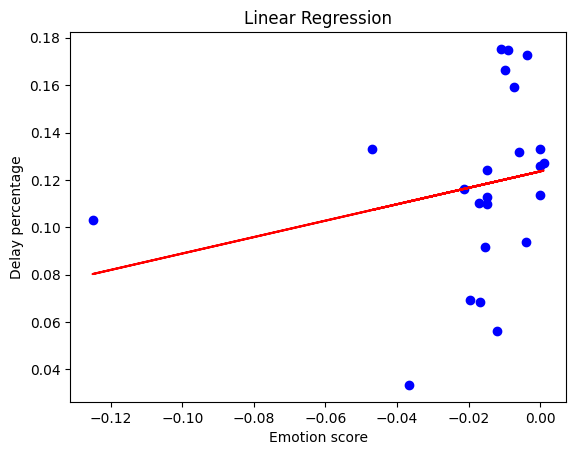

In [ ]:

x_train_tweet, x_test_tweet, y_train_tweet, y_test_tweet = train_test_split(X, Y, test_size = 0.3, random_state = 0)
x_train_tweet=x_train_tweet.reshape(-1, 1)  
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(x_train_tweet, y_train_tweet)




plt.scatter(x_train_tweet, y_train_tweet, color = 'blue')
  
plt.plot(x_train_tweet, lin.predict(x_train_tweet), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Emotion score')
plt.ylabel('Delay percentage')
  
plt.show()



Mean squared error

In [ ]:
from sklearn.metrics import mean_squared_error
x_test_tweet=x_test_tweet.reshape(-1, 1) 
y_pred = lin.predict(x_test_tweet)

mean_squared_error(y_test_tweet,y_pred)

0.00172792641751775

### Polynomial Regression

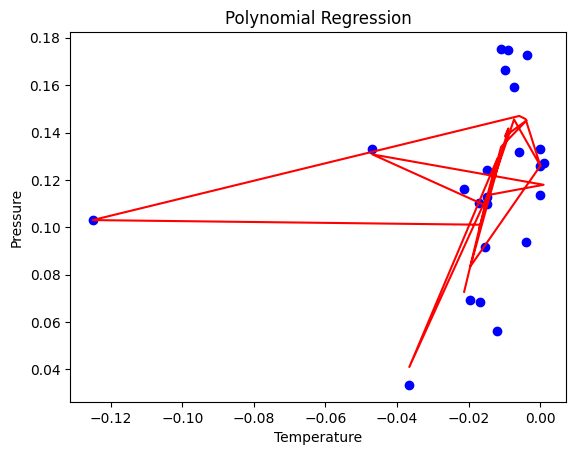

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(x_train_tweet)
X_poly1 = poly.fit_transform(x_test_tweet)  
poly.fit(X_poly,y_train_tweet)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train_tweet)

plt.scatter(x_train_tweet, y_train_tweet, color = 'blue')
  
plt.plot(x_train_tweet, lin2.predict(poly.fit_transform(x_train_tweet)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
  
plt.show()

Mean squared error

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = lin2.predict(X_poly1)

mean_squared_error(y_test_tweet,y_pred)

0.0024847254942352895